## The expectation value of position

As we have seen in the first IBM Q exercise, when we repeat an experiment where we measure the position of a particle we will most likely detect the particle at different places. This happens eventhough we carefully make sure that the particle has exactly the same wave function each time we measure the position.

So how can we describe the results we obtain if they vary each time we repeat the experiment? 

One way we will use a lot is to consider an average over many repetitions of the experiment, and the simplest thing to do is to take the average of the results obtained. For the measuremnt of the position this is the average position, also known as **the expectation value of position**.

**What:** We will set up a spatial wave function and use measurements of the position to compute the expectation value of the position. 

**Learning objective:** To understand better the expectation value of position and to get expirence with how it can be measured. 

**The wave function:** 

We will again think of each qubit as a possible position in a discrete space with 6 sites and fix time to $t=0$. So our wave function will be $\Psi(x_j,t=0)$ where $x_j=aj$ for $j=0,1,2,3,4,5$ are the possible discrete positions. (Note that the counting starts with 0.)

The wave function we consider will be 

\begin{eqnarray}
\Psi(x_0,t=0) & = & 0 \\ 
\Psi(x_1,t=0) & = & 1/2 \\ 
\Psi(x_2,t=0) & = & -1/2 \\ 
\Psi(x_3,t=0) & = & 0\\ 
\Psi(x_4,t=0) & = & -1/2 \\ 
\Psi(x_5,t=0) & = & 1/2  \ .
\end{eqnarray}

**Exercise 1:** Check that the wave function is normalized.

**Time to make predictions:**

Now let's try to predict what the expectation value of the position will be.

**Exercise 2:** Determine the probabilties that the measurement of the position will detect the particle at each of the 6 possible sites. That is determine the probability $|\Psi(x_j,t=0)|^2$ for $j=0,\ldots,5$.

**Exercise 3:** Determine the expectation value of the position if the wave function is $\Psi(x,t=0)$
\begin{equation}
\langle x  \rangle = \sum_{j=0}^5 x_j |\Psi(x_j,t=0)|^2
\end{equation}

Note that in the continium the sum is replaced by an integral (see eg. eq. (1.28) in Griffiths and Schroeter).

Now let's check our predictions! First we import the relevant libraries:

In [2]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit import assemble

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

Then let's define the functions that allow us to set up the wave function

In [3]:
#initialising a quantum circuit. 
def initial(N,M):
    q = QuantumRegister(N) #N is th number of q-bits
    c = ClassicalRegister(M) #M is the number of bits
    qc = QuantumCircuit(q,c)
    return qc


#make desired vector: 
def state(liste,qc): 
    C = np.array(liste) #len(C) is the number of states. 

    N = len(C)
    H_d = 2**N
    
    fullstate = np.zeros(H_d)
    for k in range(N):
        fullstate[(1 << k) ]+=C[k]
        
    norm = np.linalg.norm(fullstate)
    fullstate = fullstate/norm
    return qc.initialize(fullstate.tolist(), qc.qubits)


... and set up the experiment:

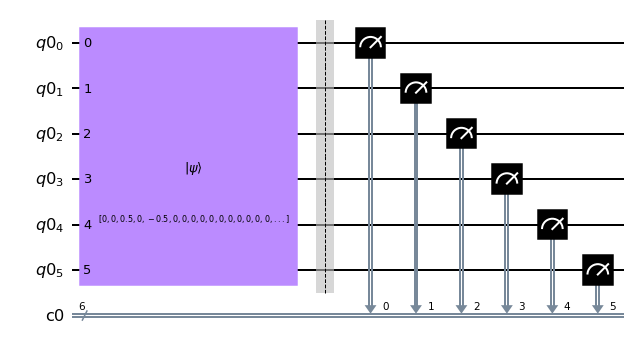

In [4]:
N=6
qc = initial(N,N)

state([0,1/2,-1/2,0,-1/2,1/2],qc)

qc.barrier() # and now measure the position
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.measure(3,3)
qc.measure(4,4)
qc.measure(5,5)
qc.draw()

**How to read the diagram:** The big purple square sets up the desired wave function and black boxes with the gauges performs the measurement of position. The arrows down to the bottom double-line indicate that the results of the measurements are stored in the classical bits marked by the number next to the arrow.

Now let's run the experiment 1024 times and plot the results in a histogram.

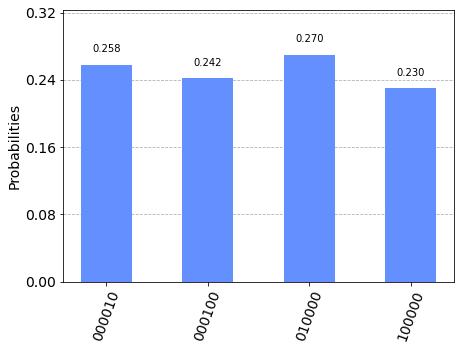

In [5]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

sim = Aer.get_backend('qasm_simulator')  # this is the simulator we'll use
qobj = assemble(qc)  # this turns the circuit into an object our backend can run
shots = 1024
result = sim.run(qobj, shots=shots).result()  # we run the experiment and get the result from that experiment
# from the results, we get a dictionary containing the number of times (counts)
# each result appeared
counts = result.get_counts()
# and display it on a histogram
plot_histogram(counts)

**How to read the result:** Each colum gives the probability for the positions marked belov the column. For example, 000010 marks the position $x_1=a$ and 100000 marks the position $x_5=5a$. If no particles where detected at a given position it is not present in the histogram.

**Exercise 4:** Check that the results are consistent with your prediction from Exercise 2.

Finally, let us compute the expectation value of the position:

In [14]:
simulator = Aer.get_backend('aer_simulator')
shots=1024
result = simulator.run(qc, shots=shots, memory=True).result()
memory = result.get_memory(qc)
y = ()
for i in range(N):   
    element = "0"*(N-1-i)+"1"+"0"*i
    y = y + (element,) 
y = tuple(y)
av=0
for x in memory:
    position = y.index(x)
    av+=position/shots
print("Expectation value of position: ", round(av,2),"a")

Expectation value of position:  3.1 a


**Exercise 5:** Check that the experimental result for the expectation value of the position is consistent with your predicted value.  

Note that the expectation value obtained from the experiment will not be exact because we 'only' did the experiment 1024 times. The exact expectation value is obtained in the limit where we repeat the experiment an infinite number of times.  

**Don't miss:** The expectation value is the average value of the measured positions obtained by repeating the experiment many times. It is **not** the most likely place to detect the particle. In our case the expectation value for the position is 3, while the probability to measure the particle at the 3rd site is zero.

**Take home:** The expectation value of position is a statistical average obtained over many experiments where we measure the position. Each time we do the experiment must carefully ensure that the particle has the exactly the same wave function before we measure the position.